In [2]:
from completeness import *
import numpy as np
from matplotlib import pyplot as plt
import astropy.io.fits as fits
from constants import Z_MAX


In [3]:
#fucntion for apparent magnitude
def calculate_apparent_magnitude(flux_data):
    ap_mag_rt = 8.9 - 2.5 * np.log10(flux_data)
    return ap_mag_rt

In [4]:
# Loading the data

# big survey
sciencegkv_galaxies_raw = fits.open('../Data/GAMA/gkvScienceCatv02/gkvScienceCatv02.fits')[1].data

# small survey
galaxies_raw = fits.open('../Data/GAMA/merged/StellarMass-gkvScience/mergedStellarMass-gkvScience')[1].data

In [5]:
# some parameters for plotting
plt.rcParams.update({
    'font.size': 18,           # Font size for text
    'axes.titlesize': 18,      # Font size for axes titles
    'axes.labelsize': 16,      # Font size for x and y labels
    'xtick.labelsize': 16,     # Font size for x tick labels
    'ytick.labelsize': 16,     # Font size for y tick labels
    'legend.fontsize': 16,     # Font size for legend text
    'figure.figsize': (15, 8), # Default figure size
})

In [6]:
# Masks

# big survey masks
sciencegkv_galaxy_mask = (
    (sciencegkv_galaxies_raw['uberclass'] == 1) &           # classified as galaxy
    (sciencegkv_galaxies_raw['duplicate'] == 0) &           # unique object
    (sciencegkv_galaxies_raw['mask'] == False) &
    (sciencegkv_galaxies_raw['starmask'] == False) &
    (sciencegkv_galaxies_raw['Z'] < Z_MAX)
    #(sciencegkv_galaxies_raw['flux_rt'] >= 5.011928e-05)    # maximum magnitude of 19.65 in r-band
)

# small survey masks
galaxy_mask = (
    (galaxies_raw['uberclass'] == 1) &           # classified as galaxy
    (galaxies_raw['duplicate'] == 0) &
    (galaxies_raw['mask'] == False) &
    (galaxies_raw['starmask'] == False) &
    (galaxies_raw['mstar'] > 0) &
    (galaxies_raw['NQ'] > 2) &                 # reliable redshift
    (galaxies_raw['Z'] != 0) &
    (galaxies_raw['Z'] != -9.999) &
    (galaxies_raw['Z'] < Z_MAX)
    #(galaxies_raw['flux_rt'] >= 5.011928e-05)
)

In [7]:
big_galaxy_catalog = sciencegkv_galaxies_raw[sciencegkv_galaxy_mask]
galaxy_catalog = galaxies_raw[galaxy_mask]

In [8]:
big_survey_region = filter_objects_by_region(big_galaxy_catalog, REGIONS_OF_SKY["G09"])
counts_of_big_survey = get_interval_counts_from_surveys(survey_name=big_survey_region , flux_type="flux_rt")
small_survey_region = filter_objects_by_region(galaxy_catalog, REGIONS_OF_SKY["G09"])
counts_of_small_survey = get_interval_counts_from_surveys(survey_name=small_survey_region , flux_type="flux_rt")


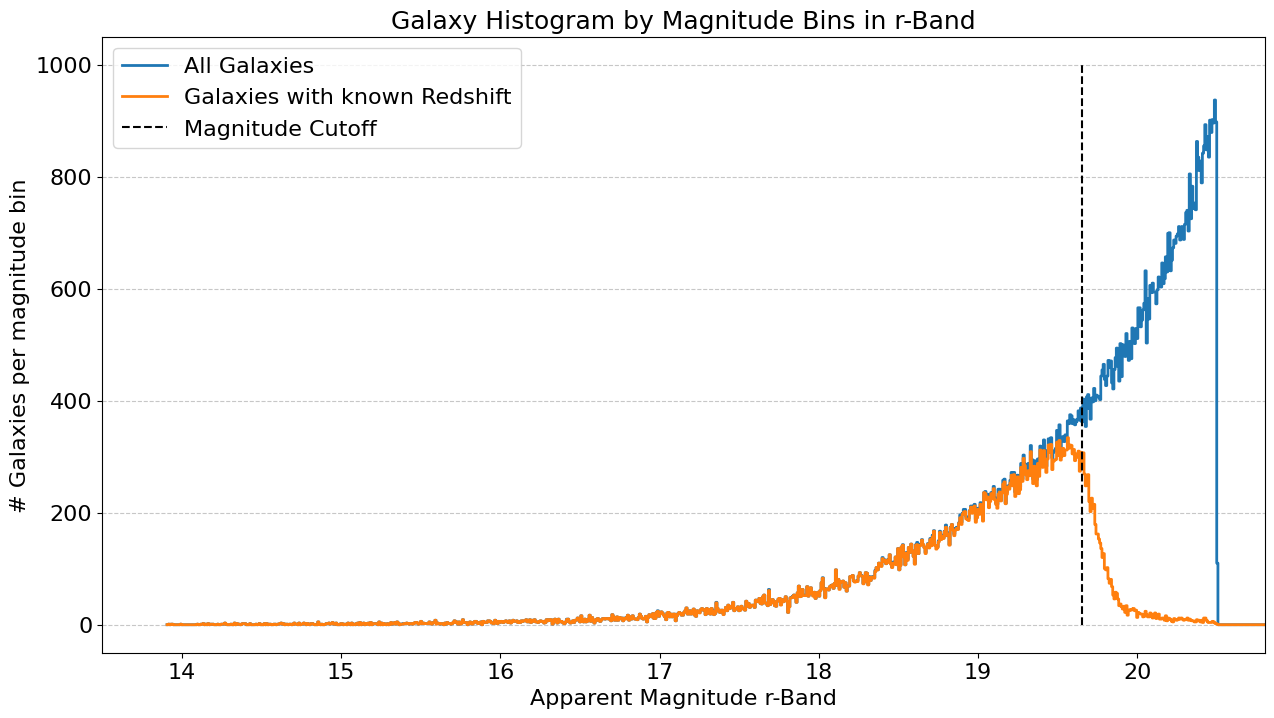

In [10]:
bin_width = calculate_apparent_magnitude(FLUX_BINS[1]) - calculate_apparent_magnitude(FLUX_BINS[0])

plt.yscale("linear"); plt.xscale("linear")
plt.xlim((13.5, 20.8))

plt.step(calculate_apparent_magnitude(FLUX_BINS[:-1]), counts_of_big_survey, label="All Galaxies", linewidth=2, where='post')
plt.step(calculate_apparent_magnitude(FLUX_BINS[:-1]), counts_of_small_survey, label="Galaxies with known Redshift", linewidth=2, where='post')
plt.vlines(19.65, ymin=0, ymax=1000, colors='k', linestyles='--', label="Magnitude Cutoff")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel("Apparent Magnitude r-Band")
plt.ylabel("Number of Galaxies")
plt.title("Galaxy Histogram by Magnitude Bins in r-Band")
plt.legend()
plt.savefig("../plots/galaxy_counts.pdf")

In [72]:
#cum_completeness = get_cumulative_completeness(big_survey=big_galaxy_catalog, small_survey=galaxy_catalog, region="G09", flux_type="flux_rt")
completeness = counts_of_small_survey / counts_of_big_survey
cum_completeness = np.cumsum(counts_of_small_survey) / np.cumsum(counts_of_big_survey)

/var/folders/2q/gdx4tqb161x17p7ttj8l7v4m0000gn/T/ipykernel_78672/88296697.py:2: RuntimeWarning: invalid value encountered in divide
  completeness = counts_of_small_survey / counts_of_big_survey
/var/folders/2q/gdx4tqb161x17p7ttj8l7v4m0000gn/T/ipykernel_78672/88296697.py:3: RuntimeWarning: invalid value encountered in divide
  cum_completeness = np.cumsum(counts_of_small_survey) / np.cumsum(counts_of_big_survey)


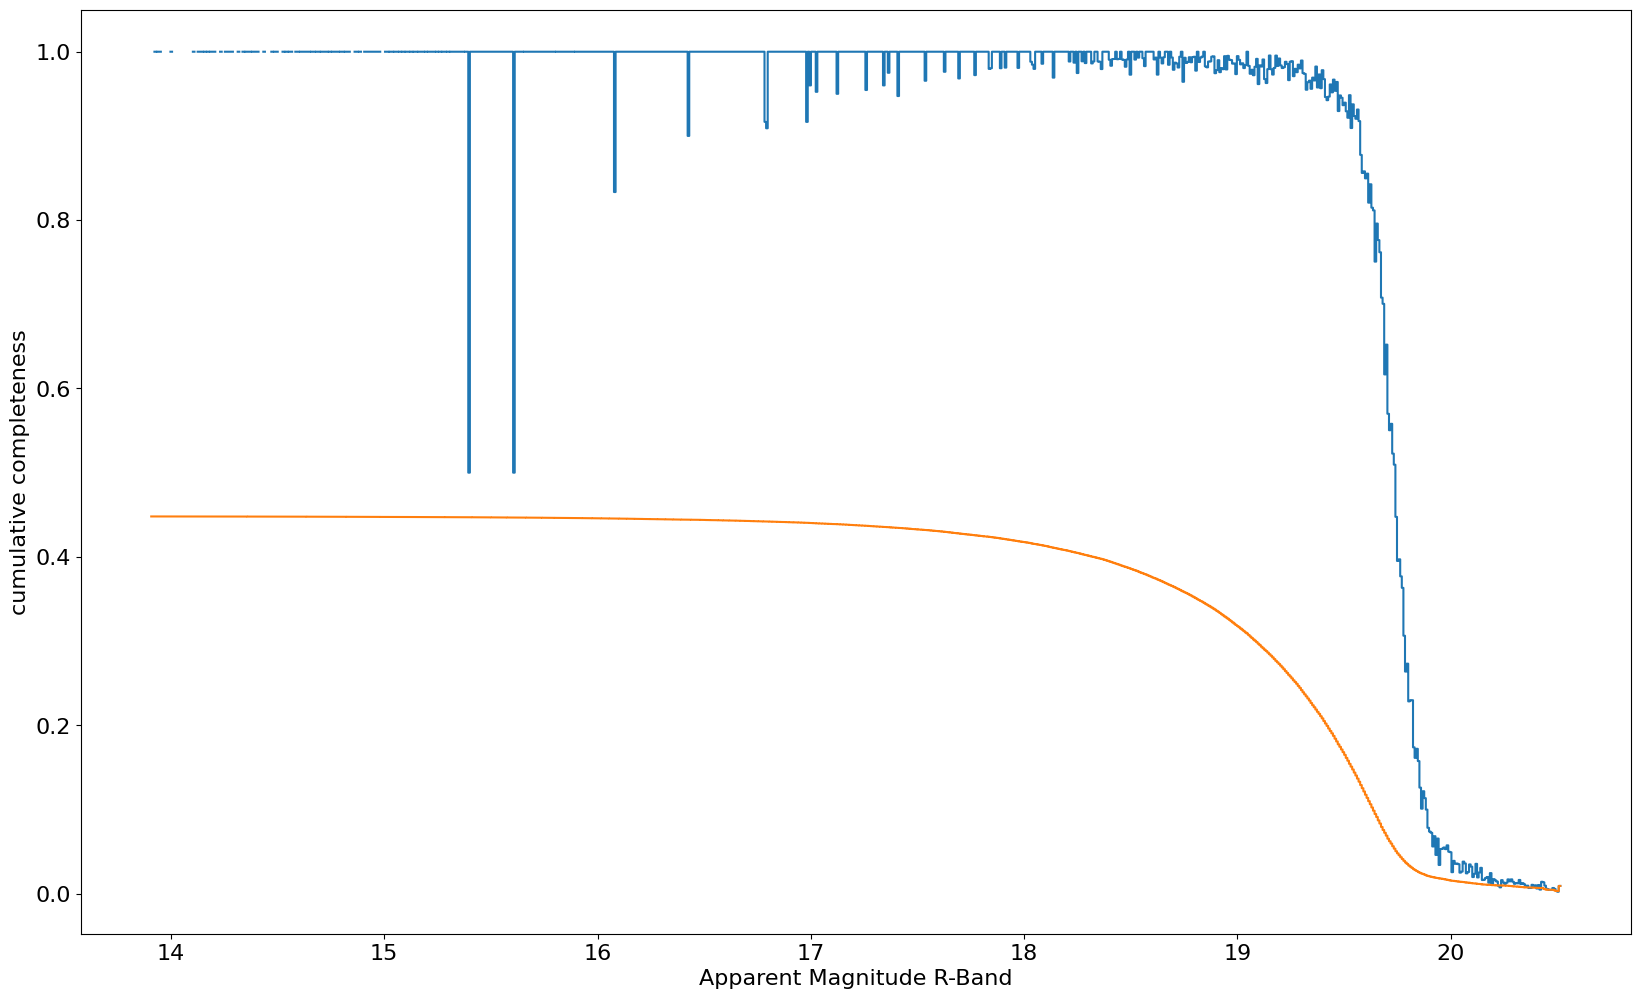

In [73]:
plt.yscale("linear"); plt.xscale("linear")
#plt.xlim((13.8, 20))
plt.step(calculate_apparent_magnitude(FLUX_BINS[:-1]), completeness)
plt.step(calculate_apparent_magnitude(FLUX_BINS[:-1]), cum_completeness)

plt.xlabel("Apparent Magnitude R-Band")
plt.ylabel("cumulative completeness")
plt.title("")
#plt.legend()
plt.show()